In [50]:
# Importing the necessary libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('/Users/stjames/Dropbox/Pablo/data/post_clinic_processing/final.csv')
mp_col = {'A Number':'Alien_Number__c','First Name':'FirstName', 'Last Name':'LastName','ICE Cohort':'ICE_Cohort__c','Client Source':'Client_Source__c','Language':'Language__c','Ethnicity':'Ethnicity__c','Mailing City':'MailingCity','Mailing County':'Mailing_County__c','Mailing State/Province':'MailingState','Mailing Zip/Postal Code':'MailingPostalCode','Country of Birth':'mp_Country_of_Birth__c','ICE Country of Birth':'Country_of_Birth__c','ICE Find':'ICE_scrape__c','Immigration Status':'Immigration_Status__c','Detention Date':'Detention_Date__c','Immigration Arrest Circumstances':'Immigration_Arrest_Circumstances__c','Marital Status':'Marital_Status__c','Gender Identity/Expression':'Gender__c','Sexual Orientation':'sexual_orientation__c','Emergency Contact Name':'AssistantName','Emergency Contact Phone':'AssistantName'}
mp_col = {v: k for k, v in mp_col.items()}
df = df.rename(columns=mp_col)
df['Marital Status'] = df['Marital Status'].replace('--None--', pd.NA)
df['ICE Cohort'] = df['ICE Cohort'].replace(['Golden State Annex', 'Mesa Verde Detention Facility'], 'GSA & MVDF')


First, calculate and plot bar graph for the distribution of 'Client Since' - when we first encountered these people

Total number of people in the data range 2022-07-24 to 2023-07-24: 322
Total number of people within the date range 2023-04-01 to 2023-06-30: 93


Distribution of 'Client Since':
2022-07     6
2022-08    17
2022-09    28
2022-10    29
2022-11    28
2022-12    12
2023-01    47
2023-02    24
2023-03    28
2023-04    21
2023-05    48
2023-06    24
2023-07     8
Freq: M, Name: Client Since Month-Year, dtype: int64


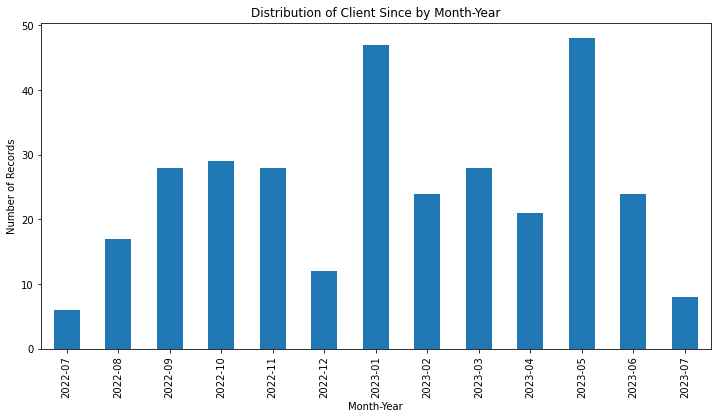



Next, calculating percentages and creating bar charts for demographic data



Column: Ethnicity
Latinx                    80.38%
Asian/Pacific Islander     6.54%
Black                      5.00%
Indigenous                 5.00%
Other                      3.08%
Name: Ethnicity, dtype: object




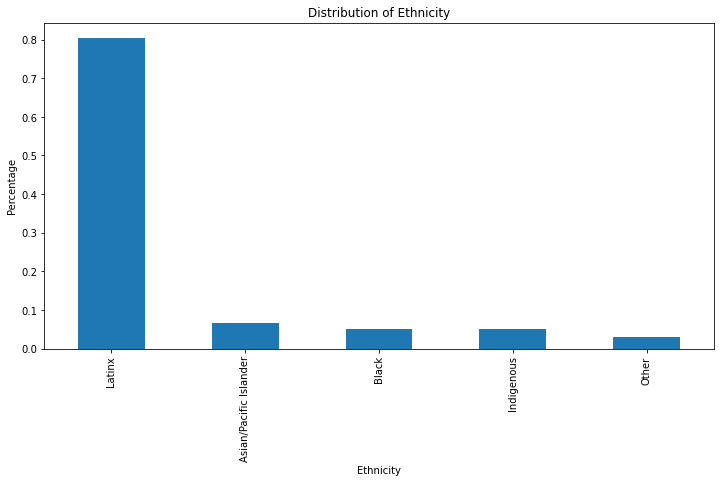




Column: Language
Spanish       65.57%
English       29.84%
Vietnamese     1.31%
Kiche          0.33%
Mandarin       0.33%
Punjabi        0.33%
Tagalog        0.33%
Nahuatl        0.33%
Mam            0.33%
Armenian       0.33%
Triqui         0.33%
French         0.33%
Romanian       0.33%
Name: Language, dtype: object




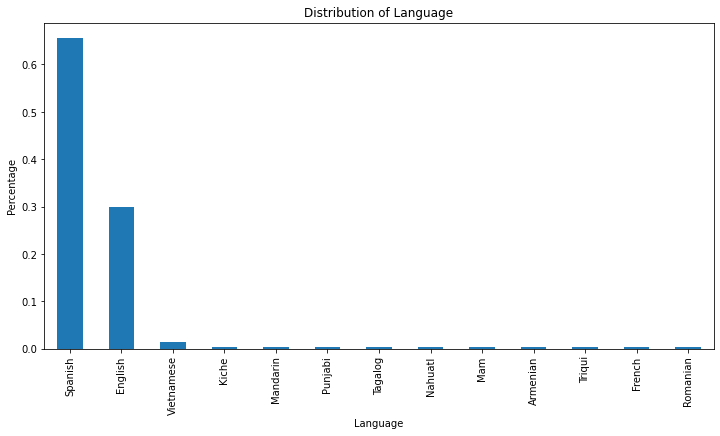




Column: Gender Identity/Expression
Male      99.65%
Female     0.35%
Name: Gender Identity/Expression, dtype: object




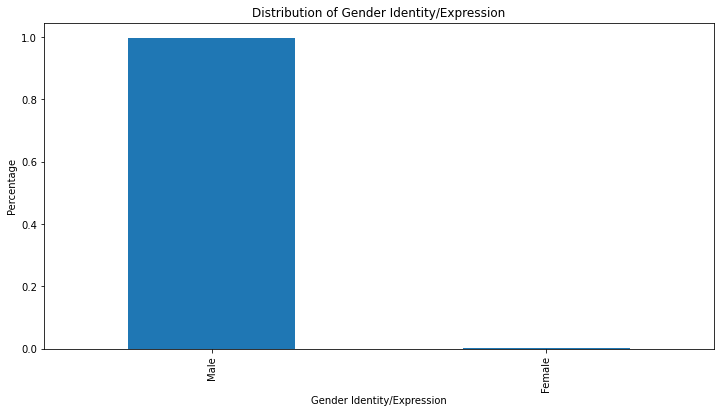




Column: Immigration Status
No Status             55.17%
Permanent Resident    36.78%
Unknown                2.30%
Other                  2.30%
Asylee                 1.92%
TPS                    1.15%
DACA                   0.38%
Name: Immigration Status, dtype: object




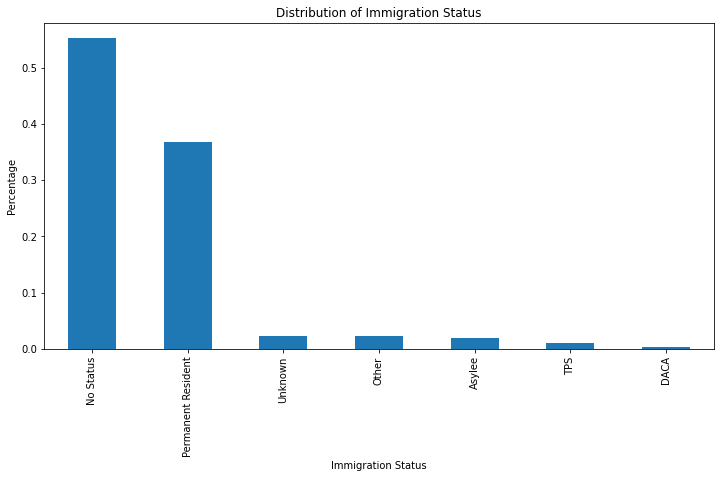




Column: Marital Status
Single       55.03%
Married      30.20%
Partnered    12.08%
Other         2.68%
Name: Marital Status, dtype: object




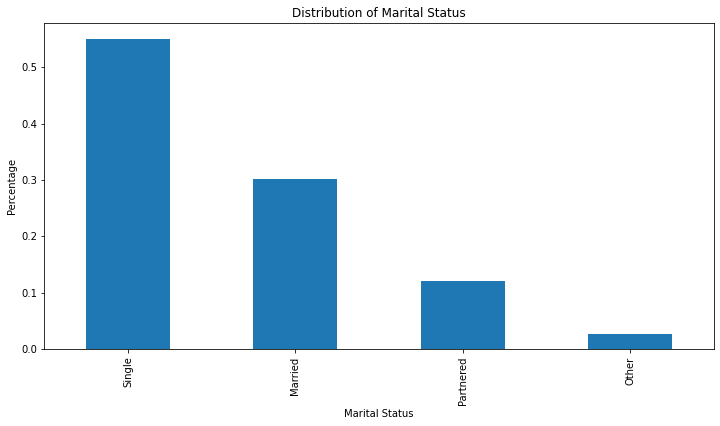




Column: Sexual Orientation
Heterosexual    98.00%
LGBTQ+           2.00%
Name: Sexual Orientation, dtype: object




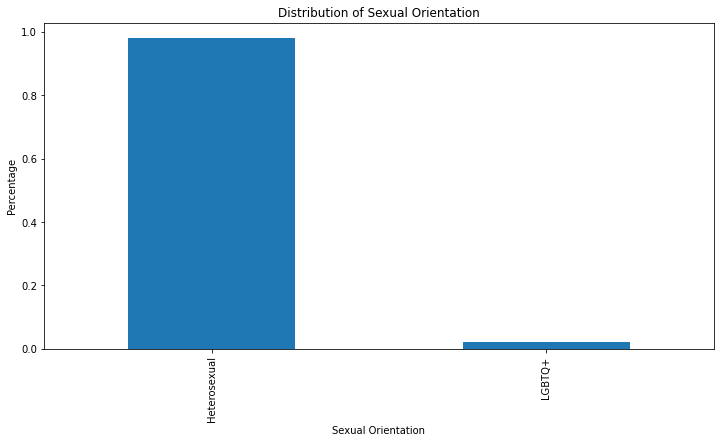




Column: ICE Cohort
GSA & MVDF                            94.03%
Imperial Regional Detention Center     5.03%
Otay Mesa Detention Center             0.63%
Yuba County Detention Facility         0.31%
Name: ICE Cohort, dtype: object




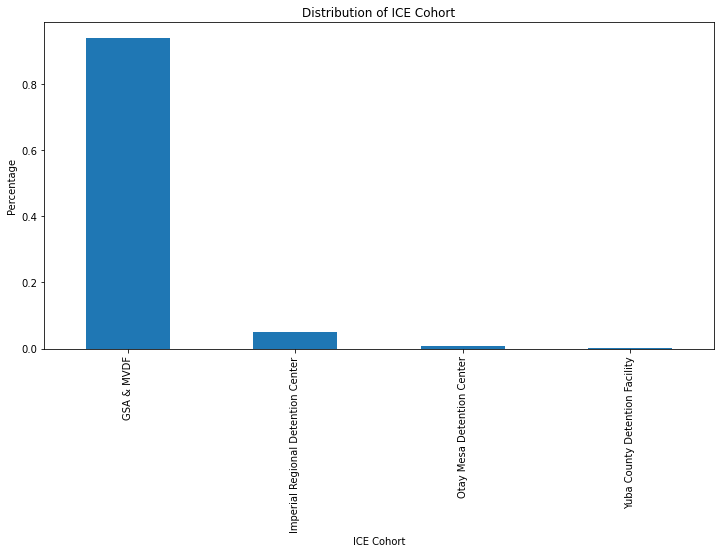





Next, calculate age from birthdate, the distribution, then plot on a histogram...

count    273.0
mean      40.0
std       12.0
min        0.0
25%       31.0
50%       39.0
75%       48.0
max       72.0
Name: Age, dtype: float64




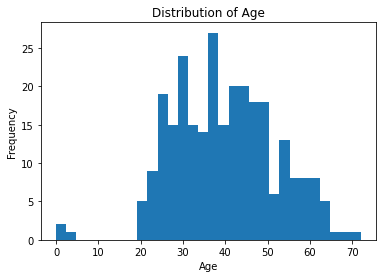

Los Angeles        31.07%
Fresno              8.74%
Santa Clara         5.83%
San Mateo           3.88%
San Joaquin         3.88%
Riverside           3.88%
Kern                3.40%
San Bernardino      3.40%
Tulare              3.40%
Madera              2.43%
Alameda             2.43%
San Francisco       2.43%
Stanislaus          1.94%
Santa Barbara       1.94%
Monterey            1.94%
Orange              1.94%
Kings               1.46%
Merced              1.46%
Butte               1.46%
Sonoma              1.46%
Contra Costa        1.46%
Sacramento          1.46%
Placer              0.97%
El Dorado           0.97%
Santa Cruz          0.97%
Solano              0.97%
Napa                0.97%
Tehama              0.97%
San Diego           0.97%
Shasta              0.49%
Monterrey           0.49%
San Luis Obispo     0.49%
Marin               0.49%
Name: Mailing County, dtype: object




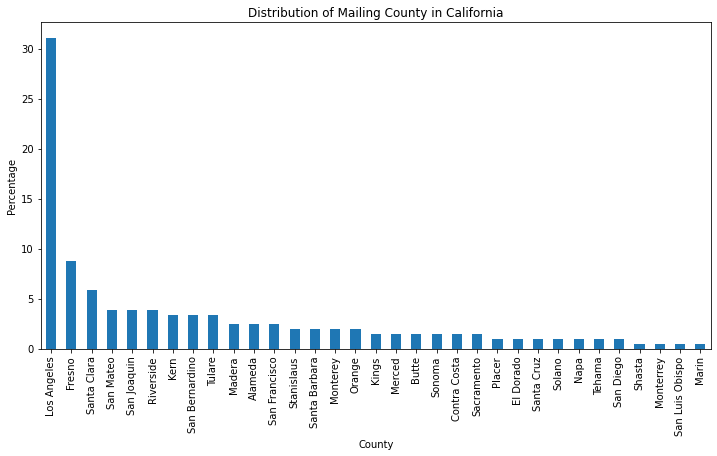

In [52]:
print('''First, calculate and plot bar graph for the distribution of 'Client Since' - when we first encountered these people\n''')

# Calculate the total number of people in the dataframe
total_people = len(df)

# Calculate the total number of people within the specified date range
date_range_people = df[(df['Client Since'] >= '2023-04-01') & (df['Client Since'] <= '2023-06-30')].shape[0]

print(f"Total number of people in the data range 2022-07-24 to 2023-07-24: {total_people}")
print(f"Total number of people within the date range 2023-04-01 to 2023-06-30: {date_range_people}\n")


# Convert 'Client Since' to datetime and extract month-year
df['Client Since'] = pd.to_datetime(df['Client Since'])
df['Client Since Month-Year'] = df['Client Since'].dt.to_period('M')

# Display the counts of records for each month-year
monthly_counts = df['Client Since Month-Year'].value_counts().sort_index()
print("\nDistribution of 'Client Since':")
print(monthly_counts)

monthly_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Client Since by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Records')
plt.show()


# Display the counts of unique values for the desired categorical columns
categorical_cols = ['Ethnicity', 'Language', 'Gender Identity/Expression', 
                    'Immigration Status', 'Marital Status', 'Sexual Orientation', 'ICE Cohort']

print('''\n\nNext, calculating percentages and creating bar charts for demographic data\n\n''')

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print((df[col].value_counts(normalize=True, dropna=True)*100).apply('{:.2f}%'.format)) 
    print('\n')
    # dropna=True to exclude nulls, normalize=True to get relative frequencies
    df[col].value_counts(normalize=True, dropna=True).plot(kind='bar', figsize=(12, 6))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show()
    print("\n")
    
    
print('''\n\nNext, calculate age from birthdate, the distribution, then plot on a histogram...\n''')


# Calculate age based on the Birthdate column

# 'Birthdate' is in the format 'YYYY-MM-DD'
df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Age'] = (datetime.now() - df['Birthdate']).astype('<m8[Y]')  # This will give age in years
# Display descriptive statistics for Age
print(round(df['Age'].describe()))
print('\n')

# Plotting histogram for Age
df['Age'].plot(kind='hist', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()


# For the county distribution

df_CA = df[df['Mailing State/Province'].isin(['CA', None])]

county_distribution = df_CA['Mailing County'].value_counts(normalize=True, dropna=True)*100

print(county_distribution.apply('{:.2f}%'.format))
print('\n')

county_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Mailing County in California')
plt.xlabel('County')
plt.ylabel('Percentage')
plt.show()